## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```
  
  
  

In [92]:
import pandas as pd
from matplotlib import pylab as plt
import numpy as np
import seaborn as sb

**Задача 1:** Який відсоток виживання серед чоловіків / жінок?

In [93]:
dataset = pd.read_csv("titanic.csv")
sur_men = dataset[dataset['Sex']=='male']
sur_wom = dataset[dataset['Sex']=='female']
print(f"Виживаність серед чоловіків:{(sur_men['Survived'].sum()/len(sur_men))*100}")
print(f"Виживаність серед жінок:{(sur_wom['Survived'].sum()/len(sur_wom))*100}")



Виживаність серед чоловіків:18.890814558058924
Виживаність серед жінок:74.20382165605095


**Задача 2:** Відтворіть ці графіки  
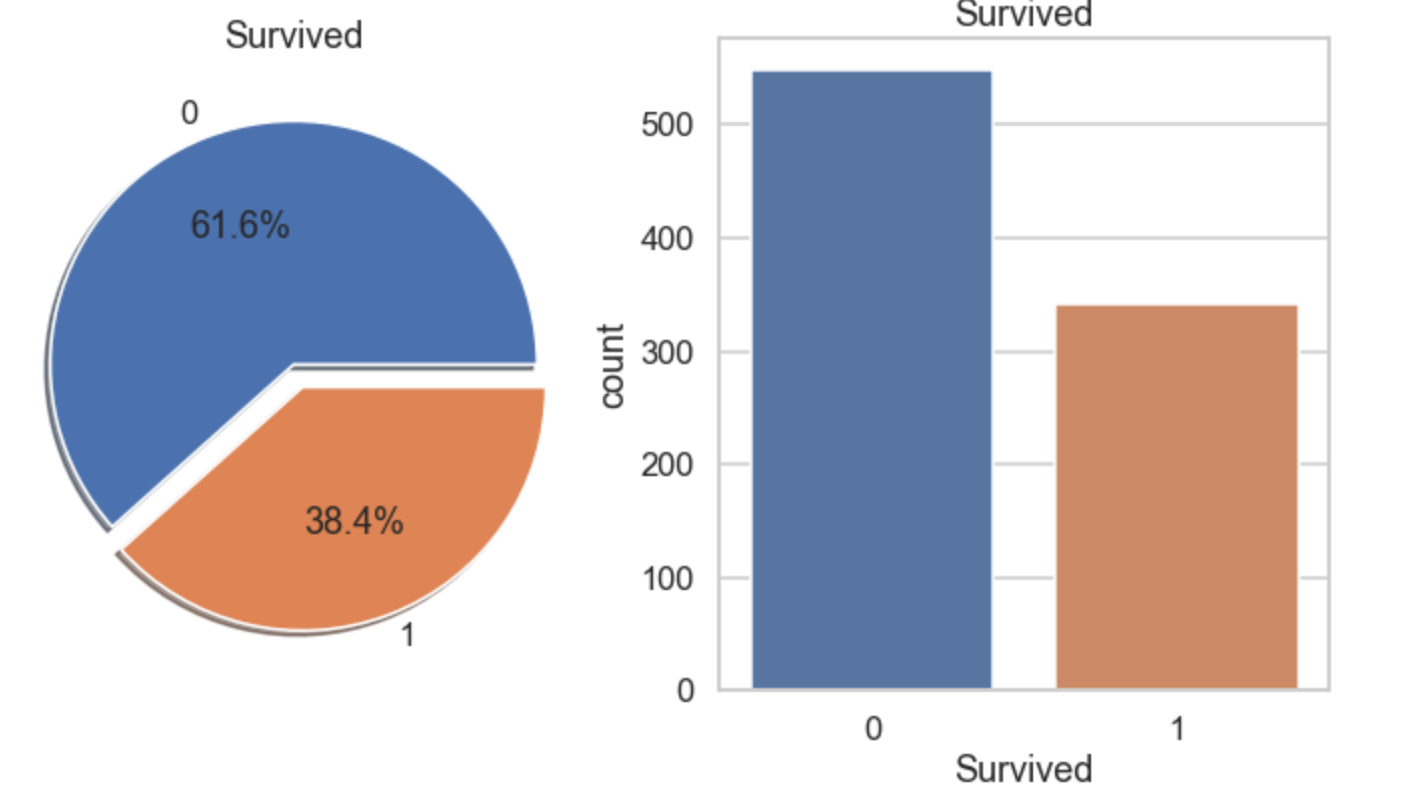


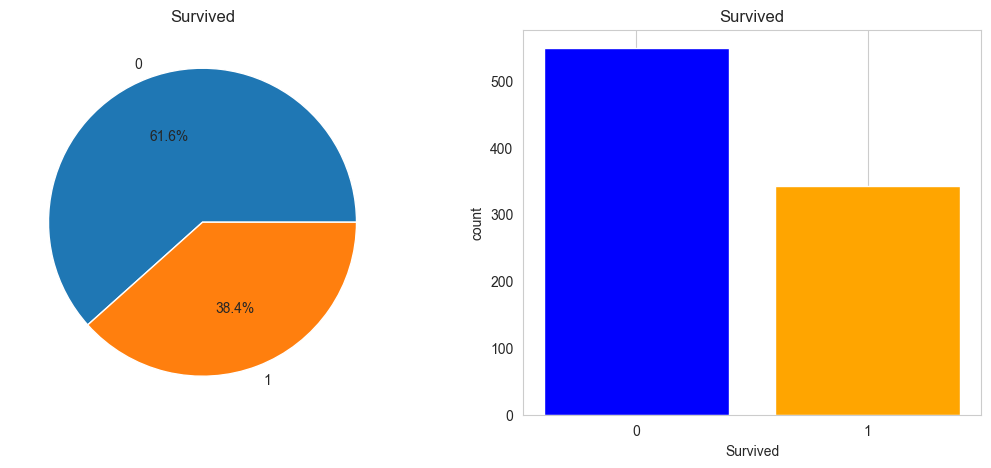

In [94]:
fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1,2,1)
sur = dataset['Survived'].sum()
not_sur = len(dataset) - sur
labels  = ['0','1']
sizes = [not_sur,sur]
ax.pie(sizes,labels =labels ,autopct='%1.1f%%')
plt.title('Survived')

ax1 = fig.add_subplot(1,2,2)
ax1.bar(labels,sizes,color=['blue','orange'])
ax1.set_xlabel("Survived")
ax1.set_ylabel("count")
plt.title('Survived')
ax1.set_axisbelow(True)
ax1.grid(axis='y')

plt.show()

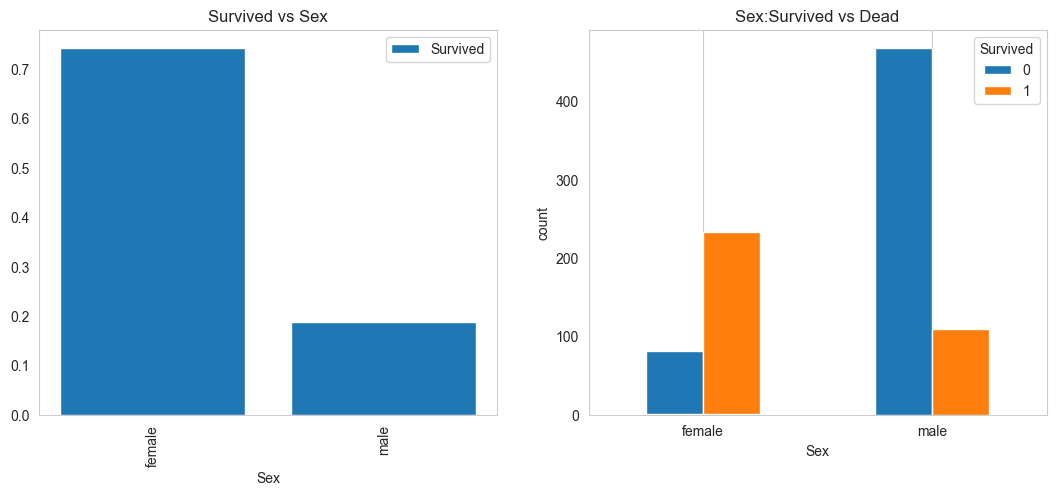

In [114]:
fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1,2,1)
male = dataset[dataset['Sex']=='male']
female = dataset[dataset['Sex']=='female']
sur_men = male['Survived'].mean().sum()
sur_wom = female['Survived'].mean().sum()
ax.bar(['female','male'],[sur_wom,sur_men],label='Survived')
plt.xlabel('Sex')
plt.title('Survived vs Sex')
plt.legend()
plt.xticks(rotation=90)
ax.set_axisbelow(True)
ax.grid()


ax1 = fig.add_subplot(1,2,2)
sur = dataset.groupby(['Sex', 'Survived']).size().unstack()
sur.plot(kind='bar',ax=ax1)
ax1.bar(['sex'],sur)
ax1.set_xlabel('Sex')
ax1.set_ylabel('count')
plt.title('Sex:Survived vs Dead')
plt.legend()
plt.xticks(rotation=0)
ax1.set_axisbelow(True)
ax1.grid(axis='y')
plt.legend(title='Survived')

plt.show()










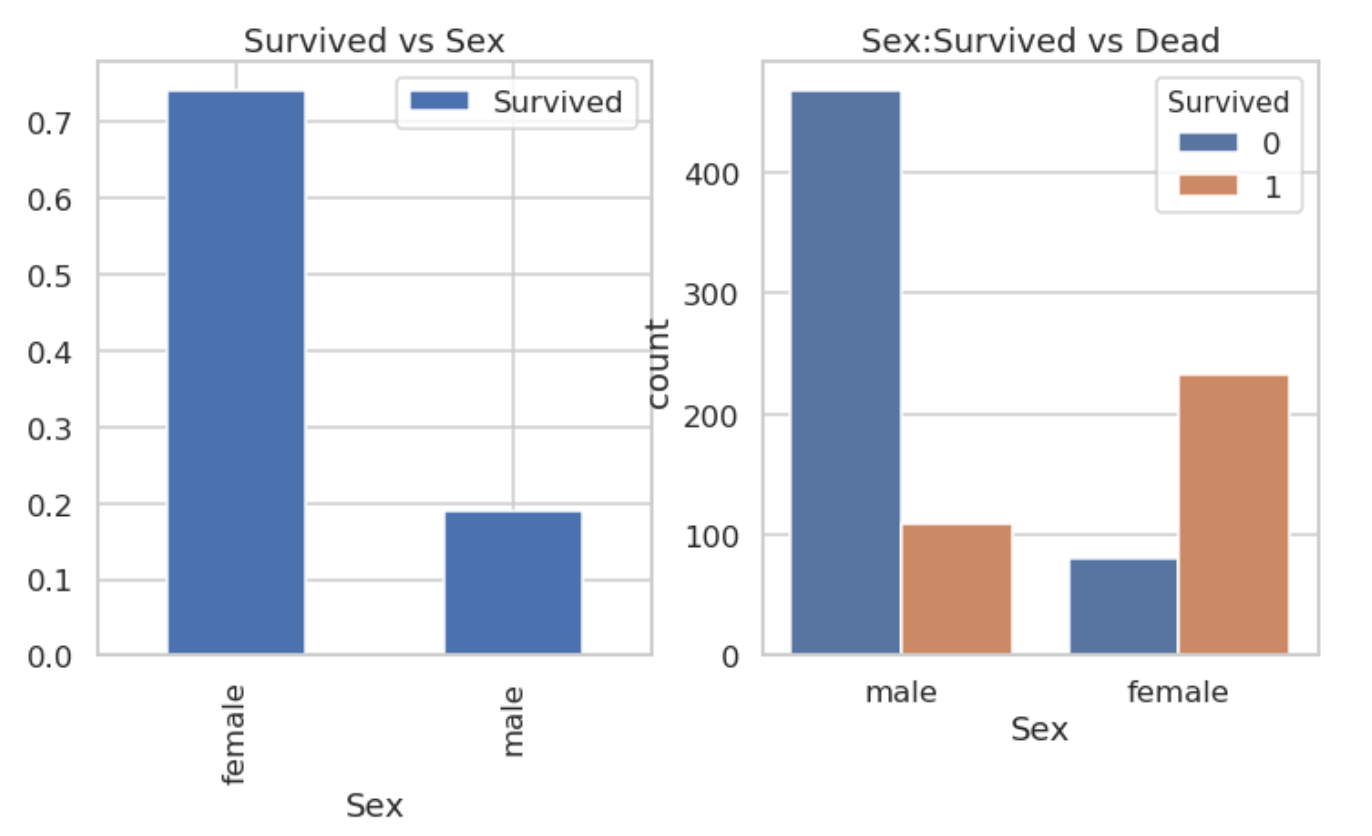

In [96]:
#coment

Прокоментуйте побудовані графіки

**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних?

In [97]:
print(dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі.

In [98]:
#code

**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі.

In [99]:
#code

**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
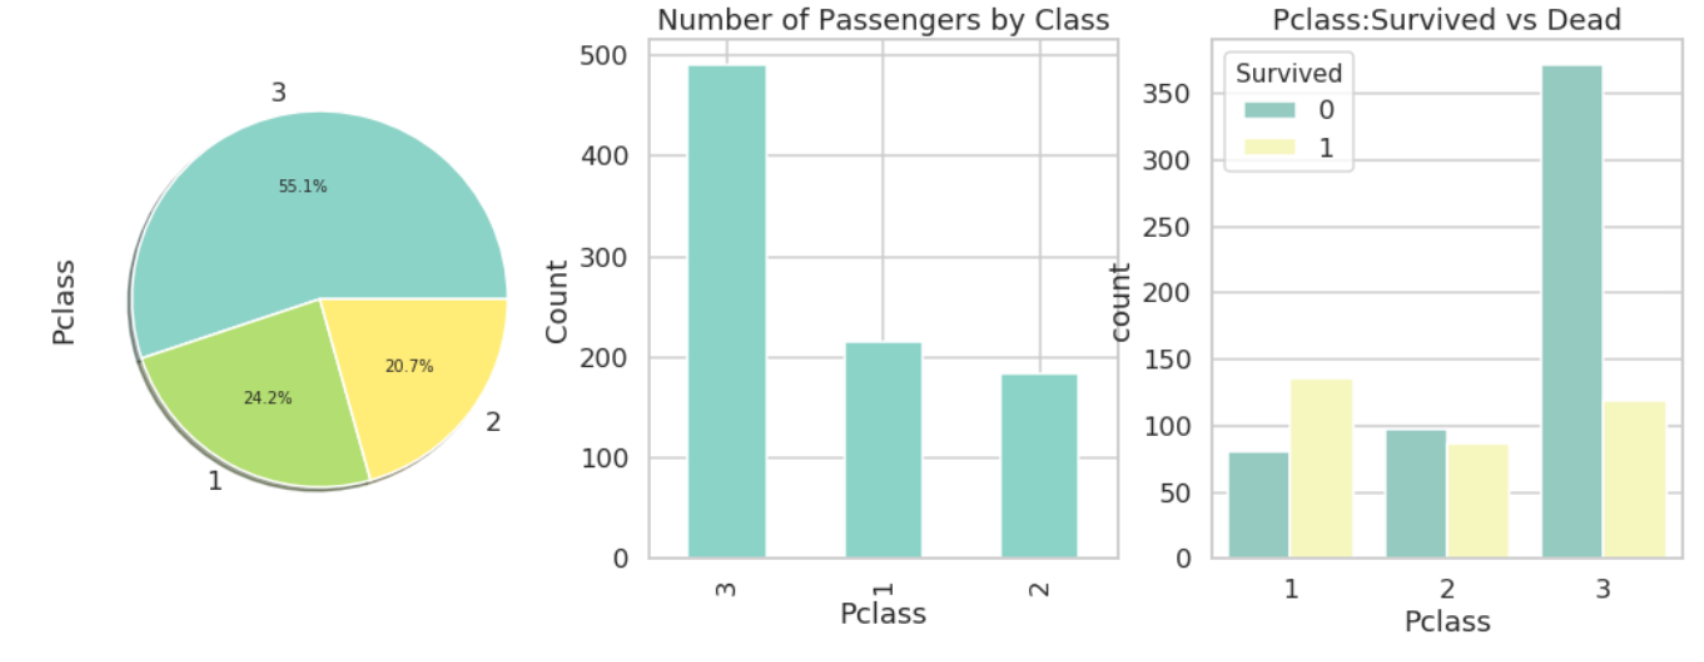

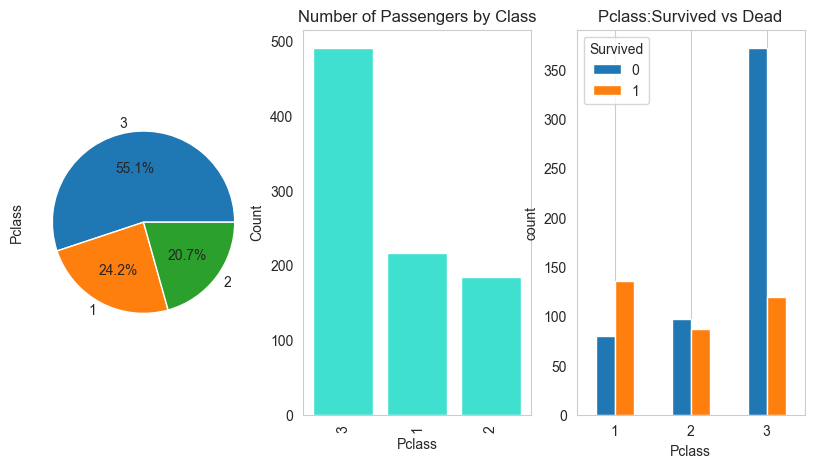

In [115]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,3,1)
pc = dataset['Pclass'].value_counts()
labelses = ['3','1','2']
ax.pie(pc,labels=labelses,autopct='%1.1f%%')
ax.set_ylabel('Pclass')

ax1 = fig.add_subplot(1,3,2)
ax1.bar(labelses,pc,color=['turquoise'])
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Count')
plt.title('Number of Passengers by Class')
ax1.set_axisbelow(True)
ax1.grid()
plt.xticks(rotation=90)

ax2 = fig.add_subplot(1,3,3)
psur = dataset.groupby(['Pclass','Survived']).size().unstack()
psur.plot(kind='bar',ax=ax2)
plt.title('Pclass:Survived vs Dead')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('count')
plt.legend(title='Survived')
ax2.set_axisbelow(True)
ax2.grid(axis='y')
plt.xticks(rotation=0)



plt.show()


Прокоментуйте побудовані графіки

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
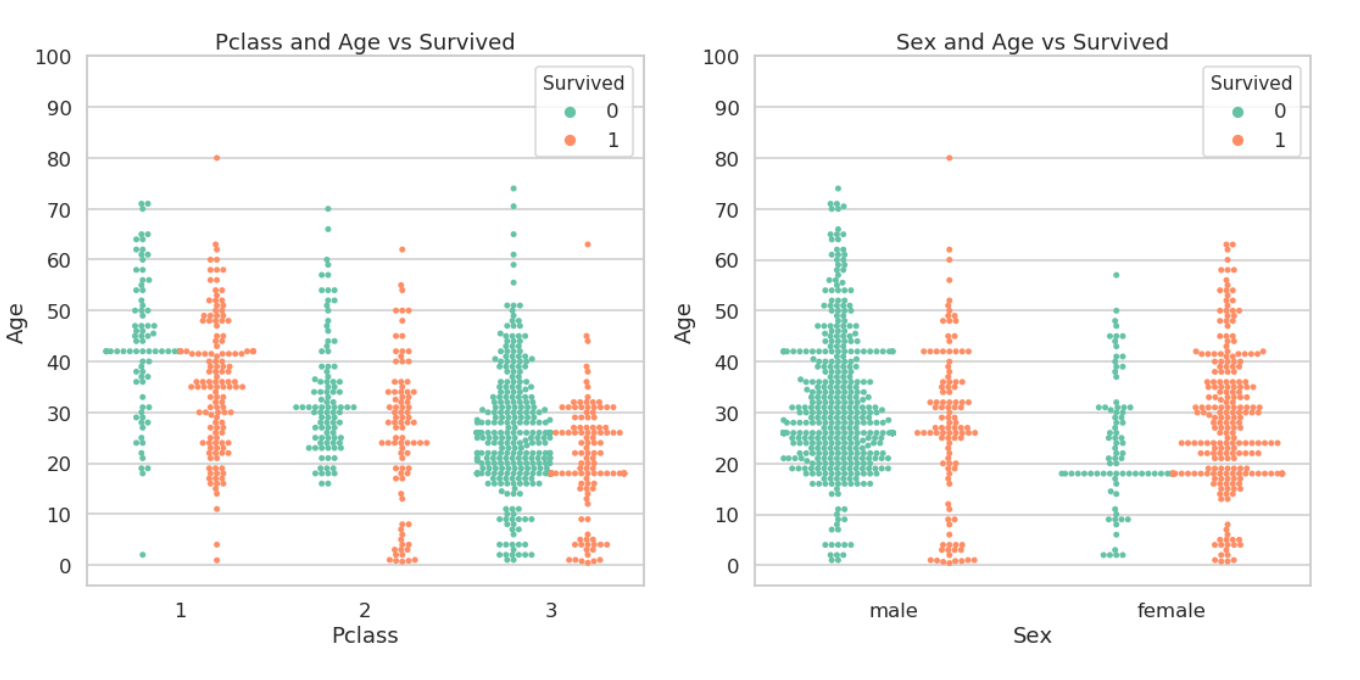![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

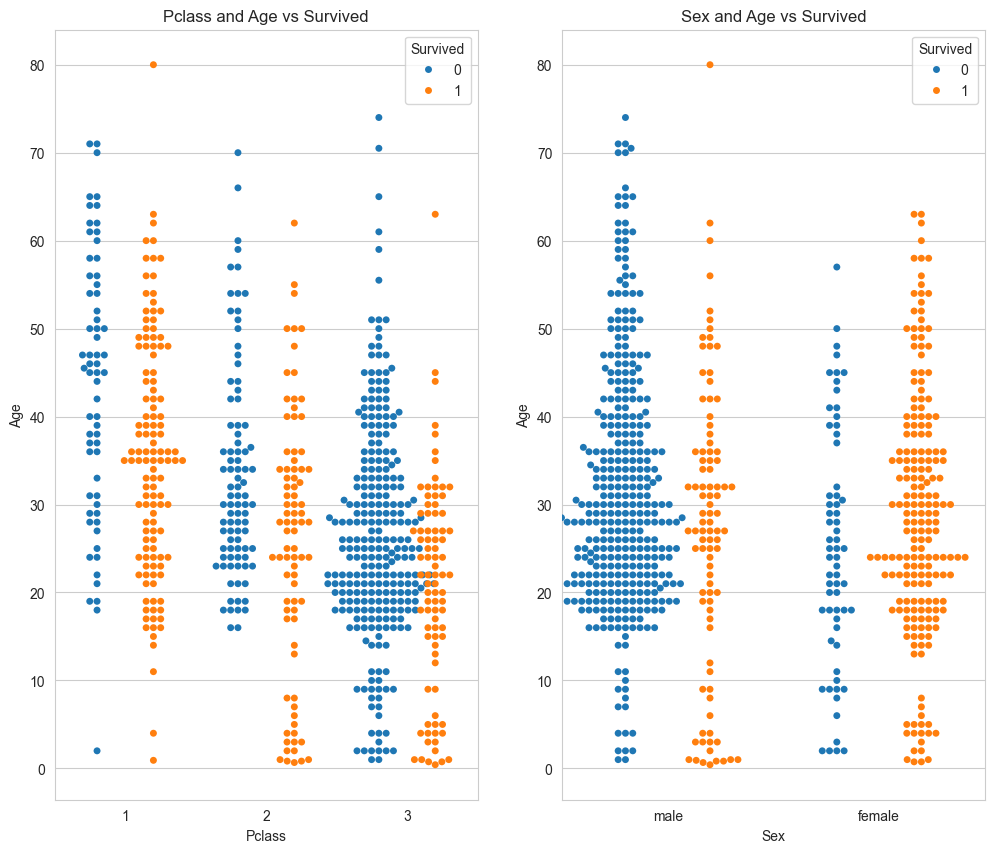

In [101]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,2,1)
sb.swarmplot(x='Pclass', y='Age', hue='Survived', data=dataset,dodge=True)
plt.title('Pclass and Age vs Survived')
plt.xlabel('Pclass')
plt.ylabel('Age')

ax1 = fig.add_subplot(1,2,2)
sb.swarmplot(x='Sex', y='Age', hue='Survived', data=dataset,dodge=True)
plt.title('Sex and Age vs Survived')
plt.xlabel('Sex')
plt.ylabel('Age')



plt.show()

In [102]:
#coment

Прокоментуйте побудовані графіки

**Задача 8** Побудуйте наступні діаграми розподілів:  

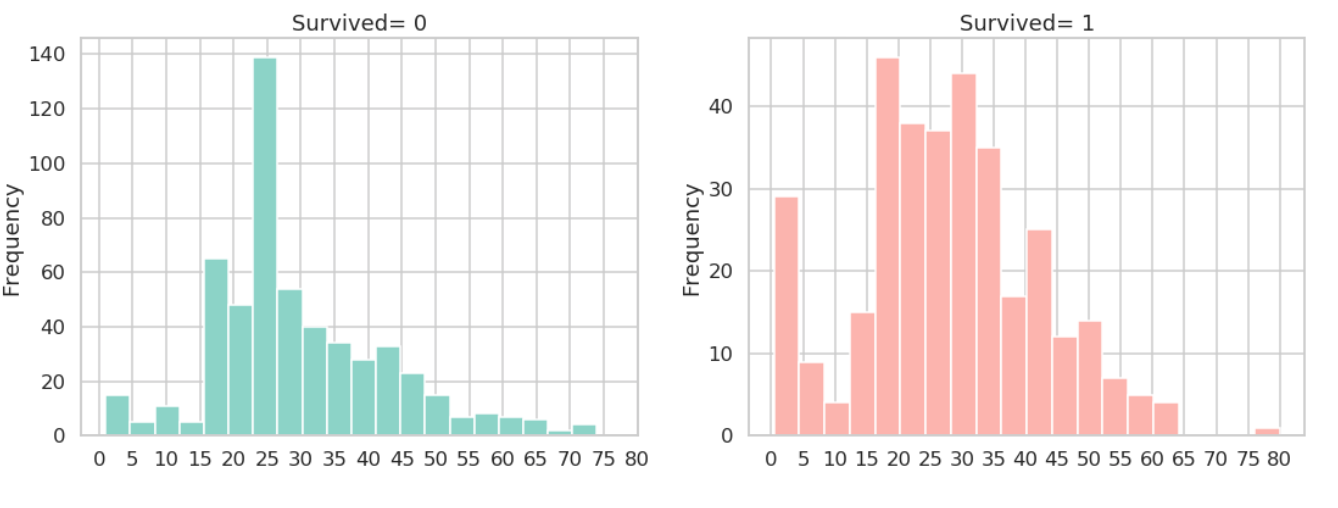



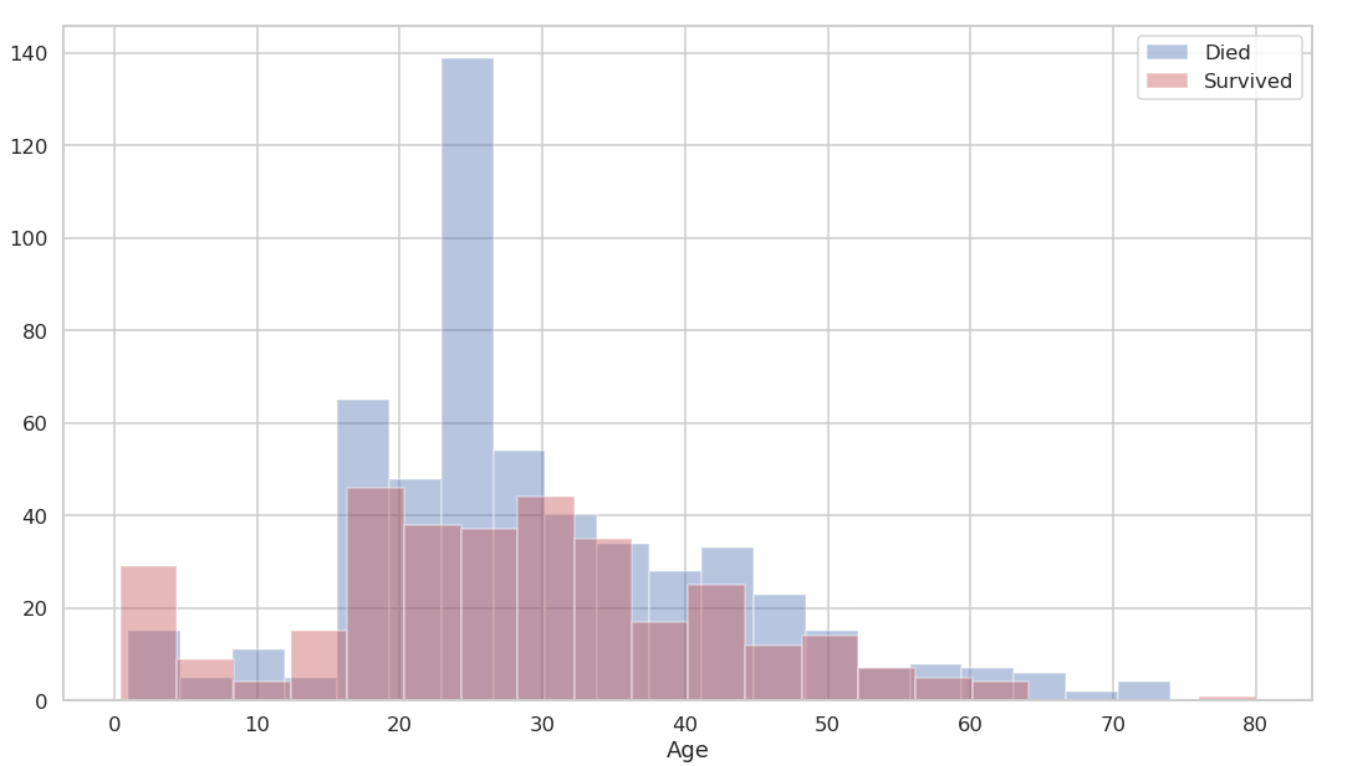

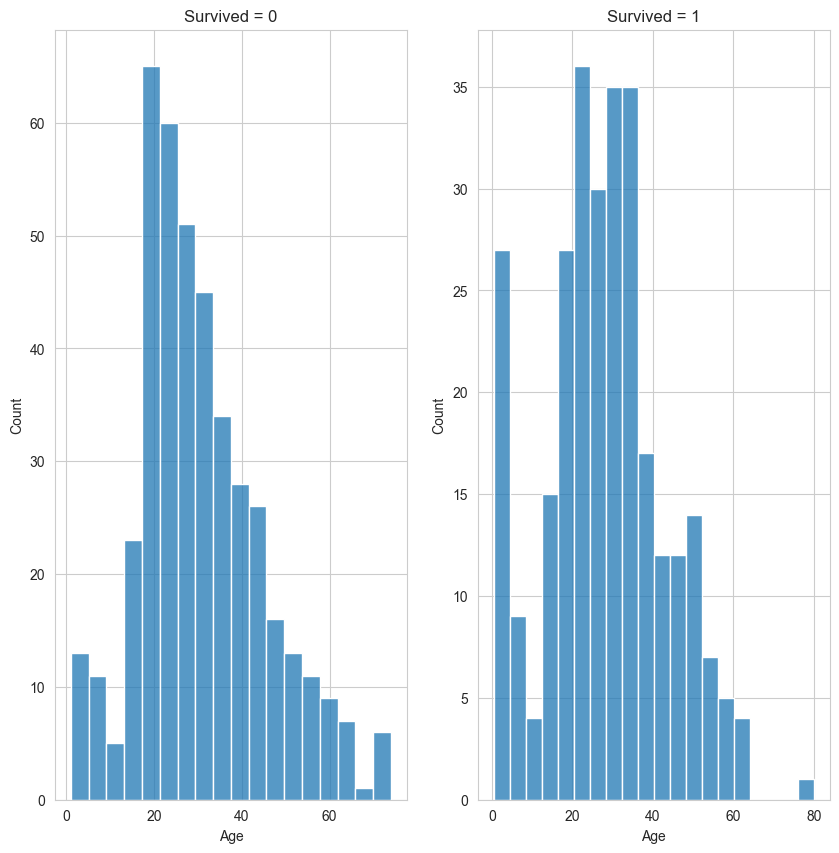

In [103]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1)
sur_age = dataset.loc[dataset['Survived']== 1,['Age']]
dead_age = dataset.loc[dataset['Survived']== 0,['Age']]
sb.set_style('whitegrid')
sb.histplot(data=dead_age,x='Age',ax=ax,binwidth=4)
ax.set_title('Survived = 0')

ax2 = fig.add_subplot(1,2,2)
sb.histplot(data=sur_age,x='Age',ax=ax2,binwidth=4)
ax2.set_title('Survived = 1')

plt.show()

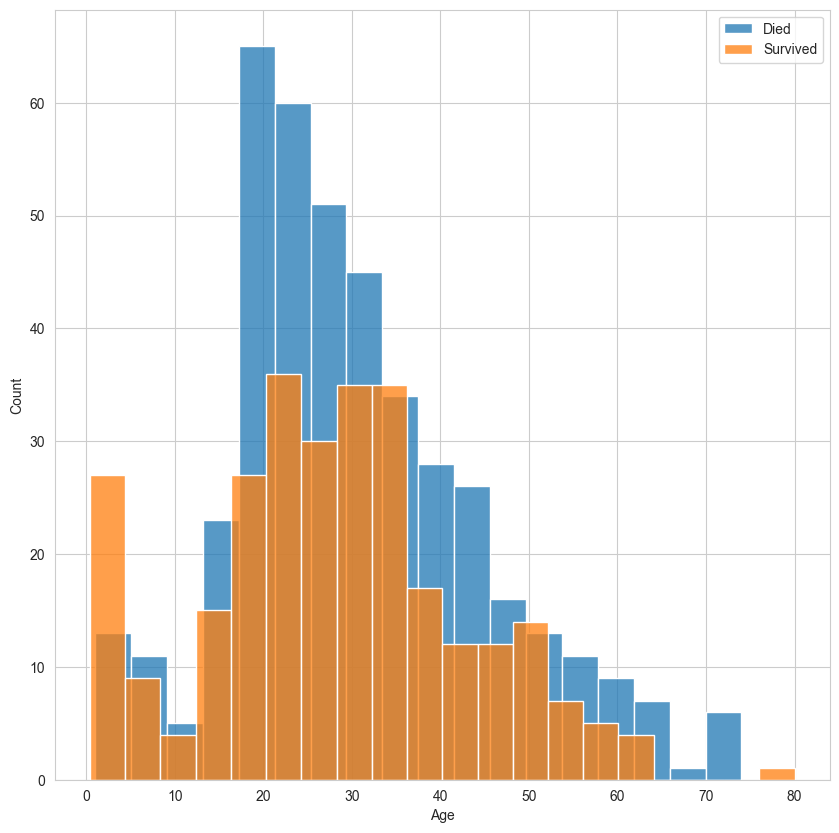

In [104]:
fig = plt.figure(figsize=(10,10))
sur_age = dataset.loc[dataset['Survived']== 1,['Age']]
dead_age = dataset.loc[dataset['Survived']== 0,['Age']]
sb.set_style('whitegrid')
sb.histplot(data=dead_age,x='Age',binwidth=4,label='Died')
sb.histplot(data=sur_age,x='Age',binwidth=4,label='Survived')
plt.legend()

plt.show()

Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?


**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
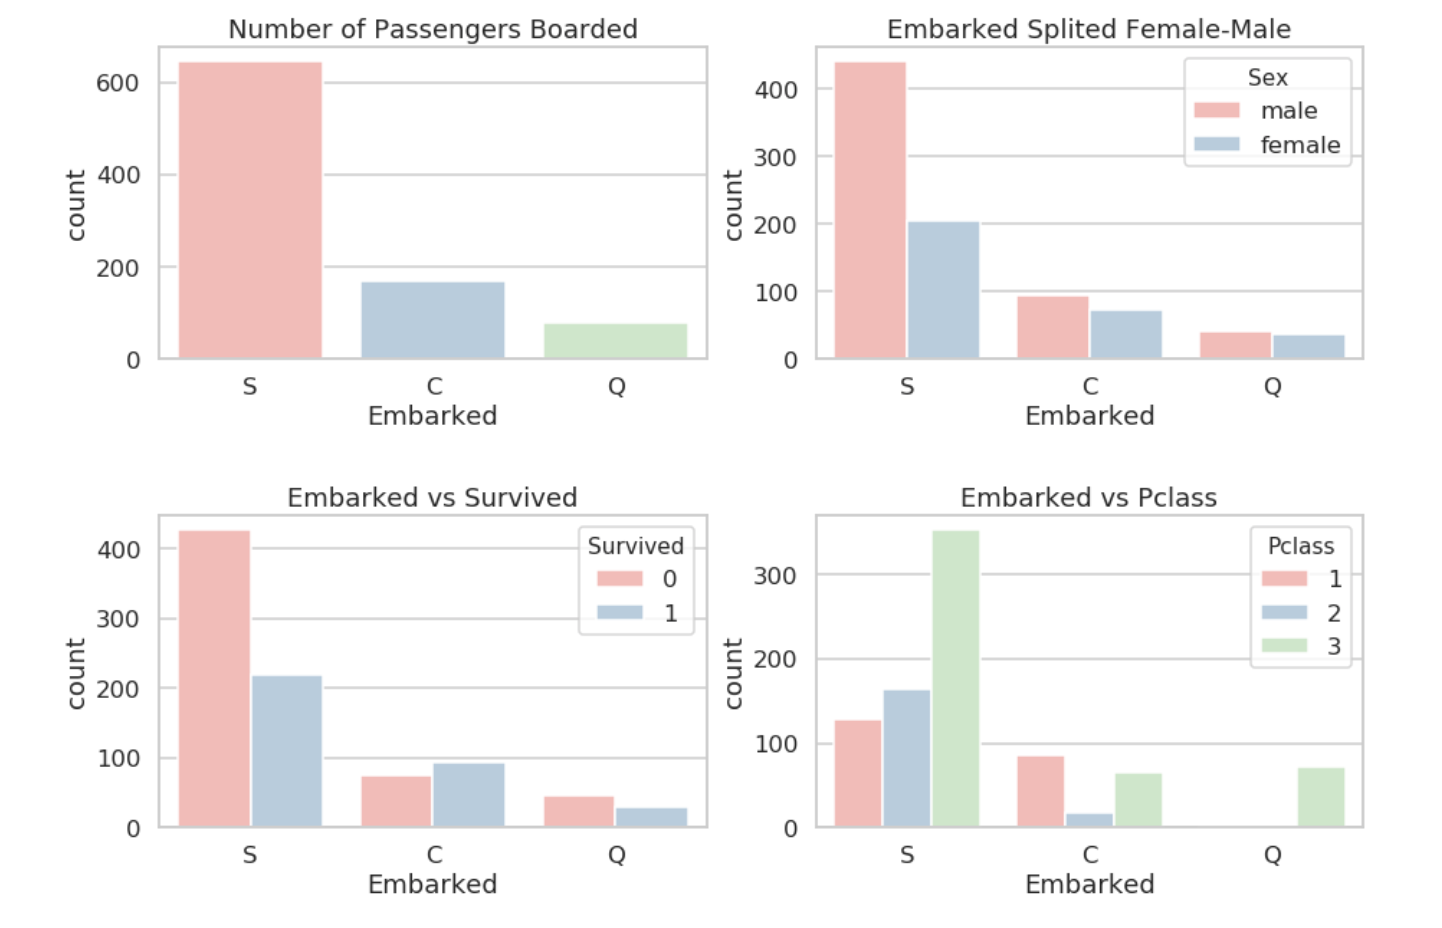

***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

In [106]:
#code

Прокоментуйте побудовані графіки